In [100]:
import pandas as pd
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

import matplotlib.dates as mdates

from numpy import diag, allclose, corrcoef, array, eye, ones, sqrt, zeros

from numpy.linalg import eig, matrix_rank, inv, cholesky, qr, norm, inv

In [2]:
# import data 

## SP futures
es = pd.read_csv('data/es.csv')

## VIX futures
vix1 = pd.read_csv('data/vix1.csv')
vix2 = pd.read_csv('data/vix2.csv')
vix3 = pd.read_csv('data/vix3.csv')

## SP volatility
month1_vol = pd.read_csv('data/1month_vol.csv')
month2_vol = pd.read_csv('data/2month_vol.csv')
month3_vol = pd.read_csv('data/3month_vol.csv')

## SP skew
month1_skew = pd.read_csv('data/1month_skew.csv')
month2_skew = pd.read_csv('data/2month_skew.csv')
month3_skew = pd.read_csv('data/3month_skew.csv')

In [3]:
# clean 

## set date as index
es.set_index('Date', inplace=True)

vix1.set_index('Date', inplace=True)
vix2.set_index('Date', inplace=True)
vix3.set_index('Date', inplace=True)

month1_vol.set_index('Date', inplace=True)
month2_vol.set_index('Date', inplace=True)
month3_vol.set_index('Date', inplace=True)

month1_skew.set_index('Date', inplace=True)
month2_skew.set_index('Date', inplace=True)
month3_skew.set_index('Date', inplace=True)

## drop bad data
vix2 = vix2.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], axis=1)
vix3 = vix3.drop(['Unnamed: 6', 'Unnamed: 7'], axis=1)

## reverse time series
es = es.iloc[::-1]

vix1 = vix1.iloc[::-1]
vix2 = vix2.iloc[::-1]
vix3 = vix3.iloc[::-1]

month1_vol = month1_vol.iloc[::-1]
month2_vol = month2_vol.iloc[::-1]
month3_vol = month2_vol.iloc[::-1]

month1_skew = month1_skew.iloc[::-1]
month2_skew = month2_skew.iloc[::-1]
month3_skew = month3_skew.iloc[::-1]

In [4]:
print(es.describe())

        ES_PX_LAST  ES_DAILY_RETURN  ES_PX_VOLUME
count  2522.000000      2522.000000  2.522000e+03
mean   1610.198961         0.000320  1.731530e+06
std     481.801632         0.013004  7.705056e+05
min     676.000000        -0.098778  1.685300e+04
25%    1224.637500        -0.003992  1.237744e+06
50%    1458.625000         0.000650  1.655553e+06
75%    2046.062500         0.005444  2.125934e+06
max    2694.500000         0.141134  6.279037e+06


In [ ]:
# Describe data

In [5]:
print(vix1.describe())
print()
print(vix2.describe())
print()
print(vix3.describe())

         1_PX_LAST  1_DAILY_RETURN    1_PX_VOLUME  1_DAYS_UNTIL_EXP
count  2522.000000     2522.000000    2522.000000       2522.000000
mean     20.670741       -0.002215   49548.591990         14.911578
std       8.990343        0.049783   49133.604665          9.199953
min       9.600000       -0.208054     100.000000          0.000000
25%      14.700000       -0.029362    5995.500000          7.000000
50%      18.012500       -0.007884   40760.000000         14.000000
75%      23.902500        0.018935   77257.500000         22.000000
max      67.950000        0.358321  379245.000000         34.000000

         2_PX_LAST  2_DAILY_RETURN    2_PX_VOLUME  2_DAYS_UNTIL_EXP
count  2522.000000     2522.000000    2522.000000       2522.000000
mean     21.525456       -0.001793   37755.884615         45.174465
std       7.971310        0.035278   39534.003555          9.417574
min      11.325000       -0.158940      22.000000         27.000000
25%      15.850000       -0.020589    4634.0000

In [6]:
print(month1_vol.describe())
print()
print(month2_vol.describe())
print()
print(month3_vol.describe())

       1M_100Imp_Vol  1M_100Imp_Daily_Return  1M_Hist_Vol_(30)  \
count    2522.000000             2522.000000       2522.000000   
mean       17.850491                0.003792         17.067667   
std         9.471244                0.096765         12.444132   
min         5.692300               -0.587039          3.180302   
25%        11.838600               -0.046195         10.003053   
50%        14.910500               -0.006197         13.817247   
75%        20.952850                0.041357         19.299560   
max        79.412400                1.956257         89.520149   

       1M_Hist_Daily_Return  
count           2522.000000  
mean              -0.001098  
std                0.057848  
min               -0.830824  
25%               -0.012236  
50%                0.000027  
75%                0.012733  
max                0.381487  

       2M_100_Imp_Vol  2M_100Imp_Daily_Return  2m_Hist_Vol_(60)  \
count     2522.000000             2522.000000       2522.000000   


In [7]:
print(month1_skew.describe())
print()
print(month2_skew.describe())
print()
print(month3_skew.describe())

       1M_90_Imp_Vol  1M_110_Imp_Vol    1M_Spread  1M_put_Daily_Return  \
count    2522.000000     2522.000000  2522.000000          2522.000000   
mean       20.744316       15.706880     5.037445            -0.002708   
std         9.870478        8.900119     1.609825             0.078796   
min         9.283600        5.883700    -3.027000            -0.473609   
25%        14.358500       10.133150     4.072250            -0.039988   
50%        17.907400       12.894050     4.746000             0.003644   
75%        23.941825       18.449375     5.738750             0.040218   
max        79.977200       76.694700    16.500000             0.397751   

       1m_call_Daily_Return  1m_Spread_Daily_Return  
count           2522.000000             2522.000000  
mean               0.004008               -0.011108  
std                0.094628                1.526624  
min               -0.389626              -75.368421  
25%               -0.044523               -0.065179  
50%      

In [8]:
# Create data matrix - all data
df = es.merge(vix1, left_index=True, right_index=True)
df = df.merge(vix2, left_index=True, right_index=True)
df = df.merge(vix3, left_index=True, right_index=True)
df = df.merge(month1_vol, left_index=True, right_index=True)
df = df.merge(month2_vol, left_index=True, right_index=True)
df = df.merge(month3_vol, left_index=True, right_index=True)
df = df.merge(month1_skew, left_index=True, right_index=True)
df = df.merge(month2_skew, left_index=True, right_index=True)
df = df.merge(month3_skew, left_index=True, right_index=True)
df.describe()

,ES_PX_LAST,ES_DAILY_RETURN,ES_PX_VOLUME,1_PX_LAST,1_DAILY_RETURN,1_PX_VOLUME,1_DAYS_UNTIL_EXP,2_PX_LAST,2_DAILY_RETURN,2_PX_VOLUME,...,2M_110_Imp_Vol,2M_Spread,2M_put_Daily_Return,2M_call_Daily_Return,2M_Spread_Daily_Return,3M_90_Imp_Vol,3M_110_Imp_Vol,3M_Spread,3M_put_Daily_Return,3M_call_Daily_Return
count,2522.000000,2522.000000,2.522000e+03,2522.000000,2522.000000,2522.000000,2522.000000,2522.000000,2522.000000,2522.000000,...,2522.000000,2522.000000,2522.000000,2522.000000,2522.000000,2522.000000,2522.000000,2522.000000,2522.000000,2522.000000
mean,1610.212145,0.000318,1.731733e+06,20.670325,-0.002197,49548.760111,14.918715,21.524841,-0.001790,37755.270024,...,16.229881,4.086690,0.001379,0.002029,0.055018,20.422533,16.878809,3.544355,0.000820,0.001242
std,481.787128,0.013004,7.705740e+05,8.990083,0.049775,49133.454661,9.196138,7.970693,0.035278,39534.513295,...,8.177936,1.200712,0.058582,0.069421,1.550824,8.246520,7.705536,1.214467,0.048527,0.057023
min,676.000000,-0.098778,1.685300e+04,9.600000,-0.208054,100.000000,0.000000,11.325000,-0.158940,22.000000,...,6.518800,-5.911000,-0.261133,-0.309119,-3.641493,10.169900,7.436800,-2.444000,-0.207557,-0.280748
25%,1224.637500,-0.004008,1.237744e+06,14.700000,-0.029350,5995.500000,7.000000,15.850000,-0.020589,4603.500000,...,10.849100,3.413250,-0.031742,-0.035968,-0.049200,14.734275,11.681950,2.923250,-0.026696,-0.029796
50%,1458.625000,0.000648,1.655553e+06,18.012500,-0.007848,40760.000000,14.000000,19.200000,-0.003883,30312.000000,...,13.687100,3.812500,-0.003703,-0.003594,-0.000756,18.154650,14.615300,3.281000,-0.002969,-0.003109
75%,2046.062500,0.005444,2.127129e+06,23.902500,0.018935,77257.500000,22.000000,24.972500,0.013965,55855.500000,...,19.177875,4.630000,0.028365,0.032820,0.048531,23.698775,20.056900,4.070750,0.022256,0.026111
max,2694.500000,0.141134,6.279037e+06,67.950000,0.358321,379245.000000,34.000000,59.770000,0.255319,397627.000000,...,68.263200,12.629000,0.360700,0.433064,74.576271,66.351000,63.166500,12.897000,0.310800,0.398820


In [9]:
# futures data
df_futures = es.merge(vix1, left_index=True, right_index=True)
df_futures = df_futures.merge(vix2, left_index=True, right_index=True)
df_futures = df_futures.merge(vix3, left_index=True, right_index=True)
df_futures.head()

,ES_PX_LAST,ES_DAILY_RETURN,ES_PX_VOLUME,1_Future,1_PX_LAST,1_DAILY_RETURN,1_PX_VOLUME,1_DAYS_UNTIL_EXP,2_Future,2_PX_LAST,2_DAILY_RETURN,2_PX_VOLUME,2_DAYS_UNTIL_EXP,3_Future,3_PX_LAST,3_DAILY_RETURN,3_PX_VOLUME,3_DAYS_UNTIL_EXP
Date,,,,,,,,,,,,,,,,,,
1/2/08,1458.50,-0.012693,1623508,F08,23.86,0.032007,1192,13,G08,24.49,0.012402,654,44,H08,24.34,0.006201,128,76
1/3/08,1458.75,0.000171,1266237,F08,23.42,-0.018441,414,12,G08,24.52,0.001225,173,43,H08,24.31,-0.001233,316,75
1/4/08,1423.00,-0.024507,2199479,F08,24.68,0.053800,1146,11,G08,25.30,0.031811,513,42,H08,25.01,0.028795,436,74
1/7/08,1421.50,-0.001054,2436934,F08,24.12,-0.022690,1092,8,G08,24.81,-0.019368,473,39,H08,24.54,-0.018792,267,71
1/8/08,1397.00,-0.017235,2902242,F08,25.54,0.058872,3146,7,G08,25.90,0.043934,938,38,H08,25.52,0.039935,140,70


In [11]:
df_futures_px = df_futures.drop(['ES_PX_LAST',
                                'ES_DAILY_RETURN', 
                                'ES_PX_VOLUME', 
                                '1_Future',
                                '1_DAILY_RETURN',
                                '1_PX_VOLUME',
                                '1_DAYS_UNTIL_EXP',
                                '2_Future',
                                '2_DAILY_RETURN',
                                '2_PX_VOLUME',
                                '2_DAYS_UNTIL_EXP',
                                '3_Future',
                                '3_DAILY_RETURN',
                                '3_PX_VOLUME',
                                '3_DAYS_UNTIL_EXP'],
                                axis=1)
df_futures_px.head()

,1_PX_LAST,2_PX_LAST,3_PX_LAST
Date,,,
1/2/08,23.86,24.49,24.34
1/3/08,23.42,24.52,24.31
1/4/08,24.68,25.30,25.01
1/7/08,24.12,24.81,24.54
1/8/08,25.54,25.90,25.52


<IPython.core.display.Javascript object>


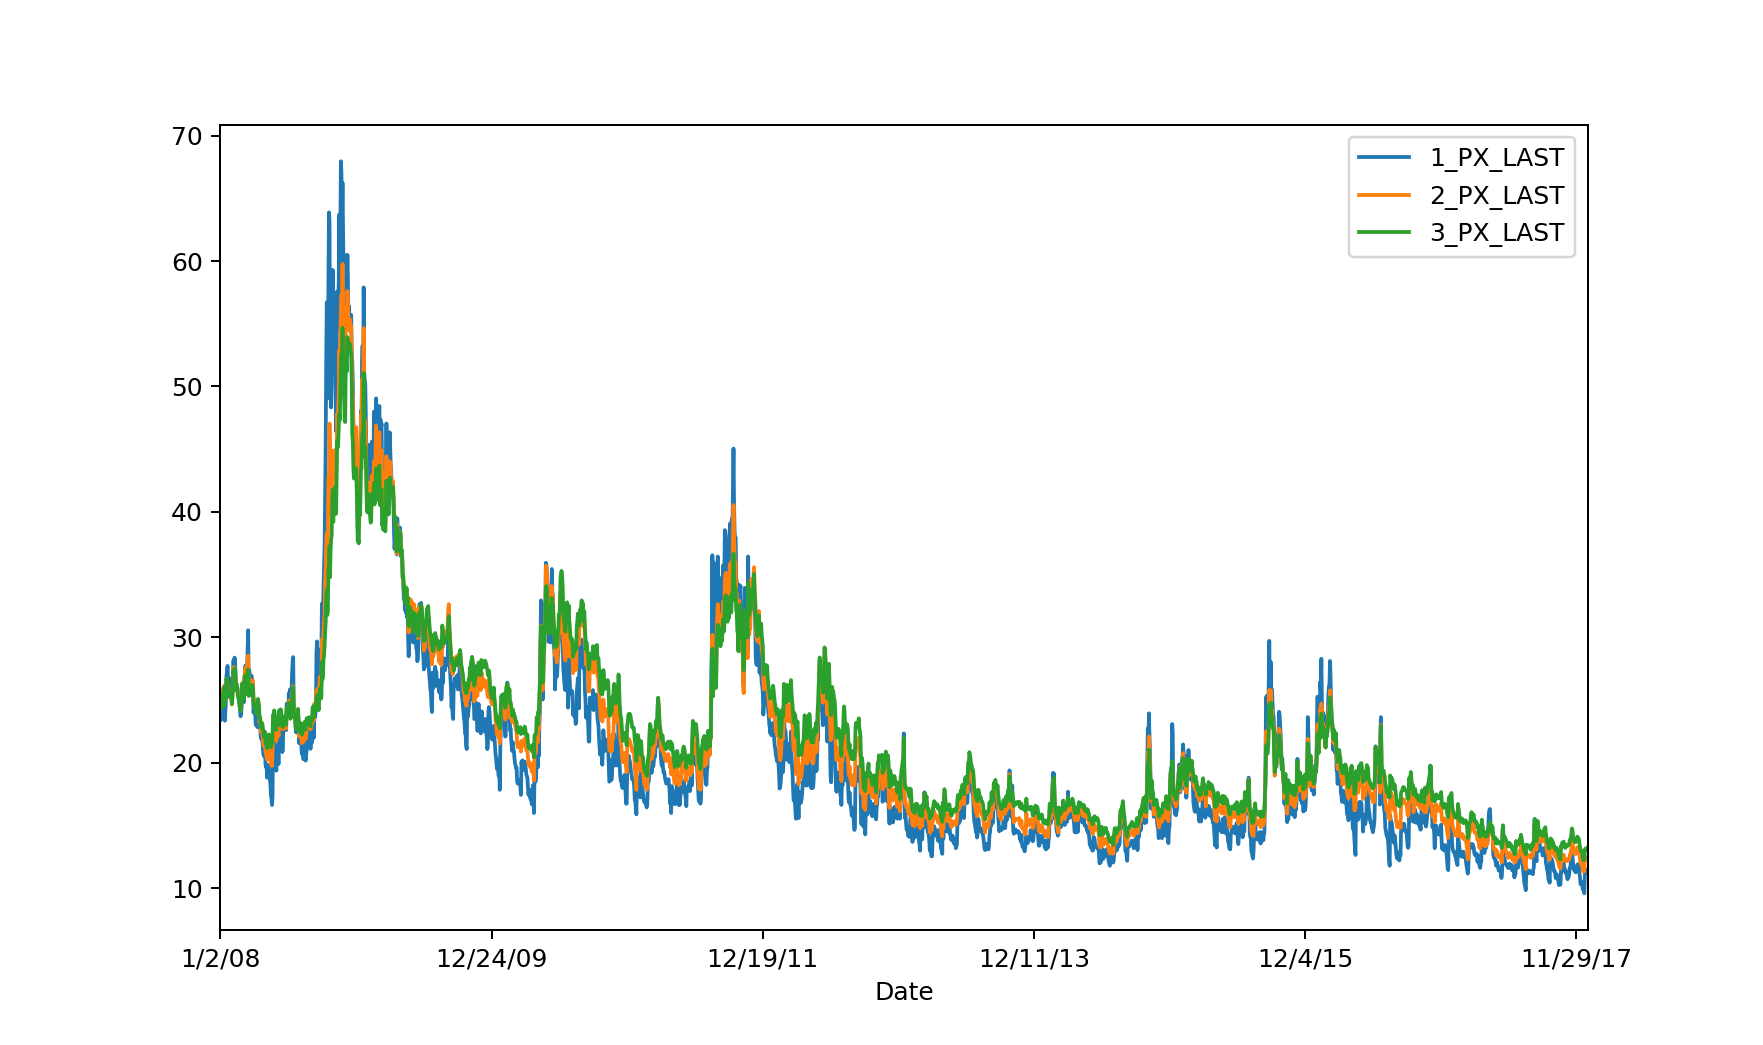

In [12]:
# vix futures time series
df_futures_px.plot()

<IPython.core.display.Javascript object>


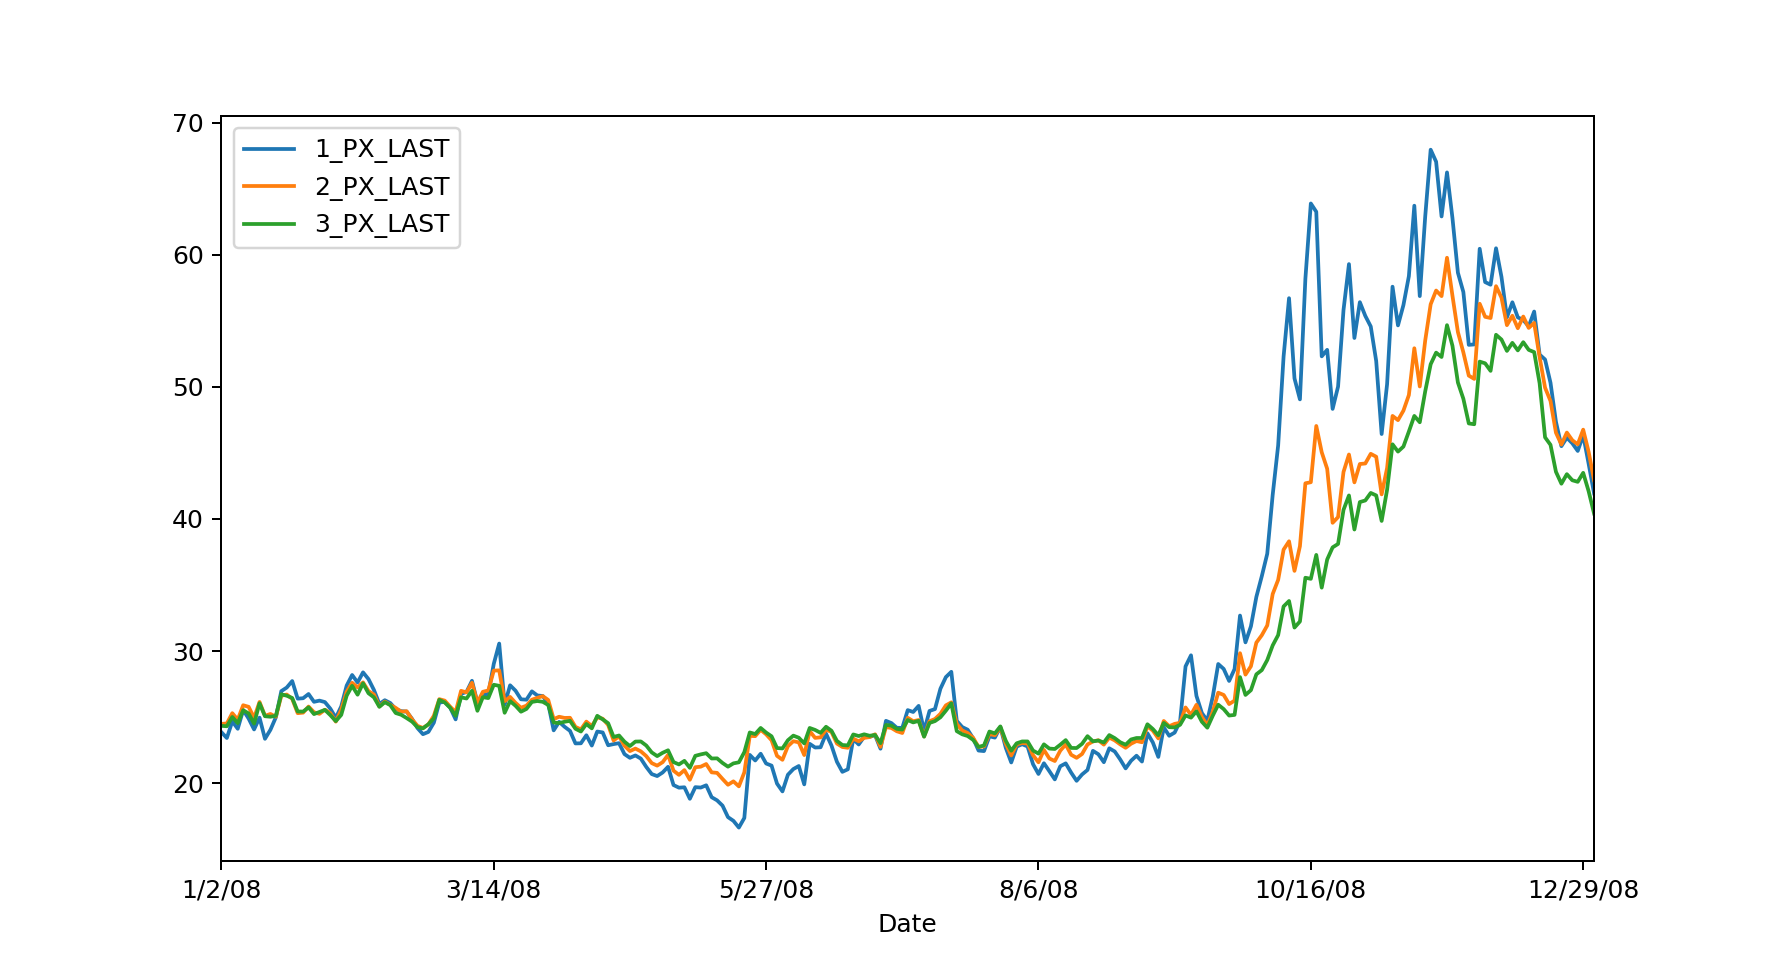

In [13]:
# comparison 2008
df_futures_px['1/2/08':'12/31/08'].plot()

<IPython.core.display.Javascript object>


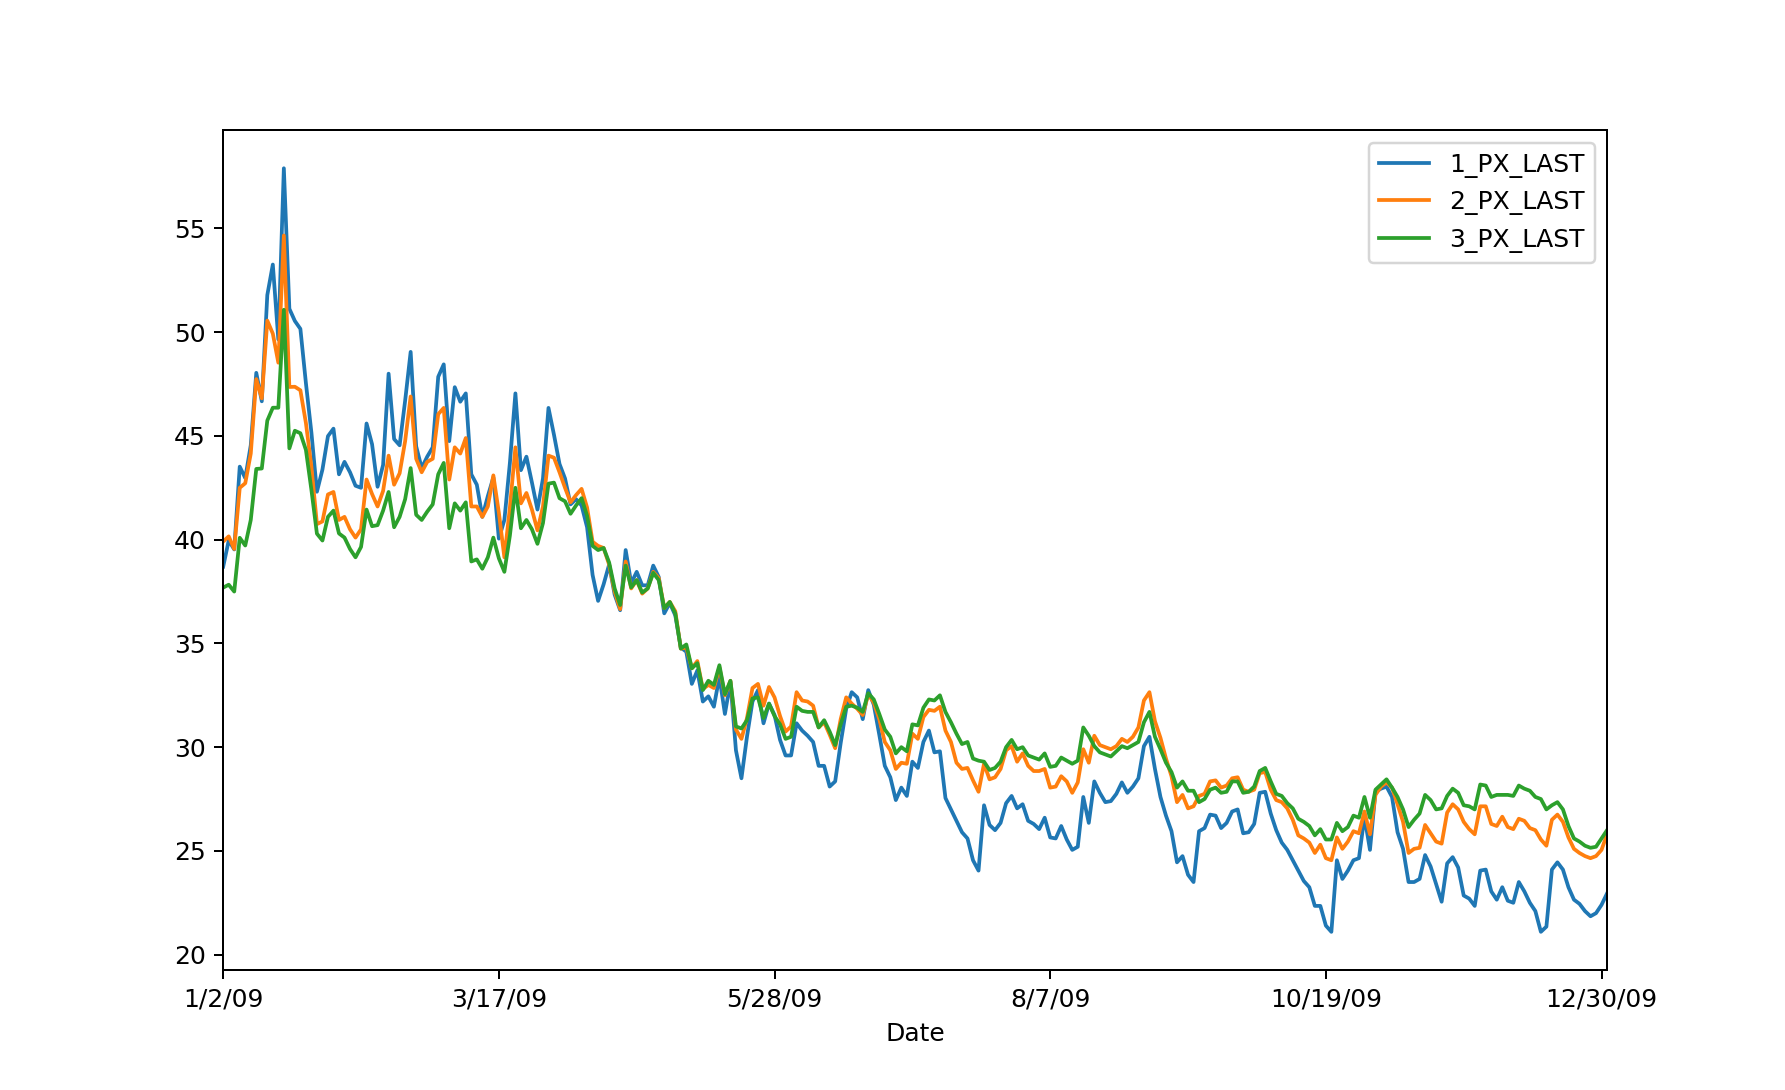

In [15]:
# comparison 2009
df_futures_px['1/2/09':'12/31/09'].plot()

<IPython.core.display.Javascript object>


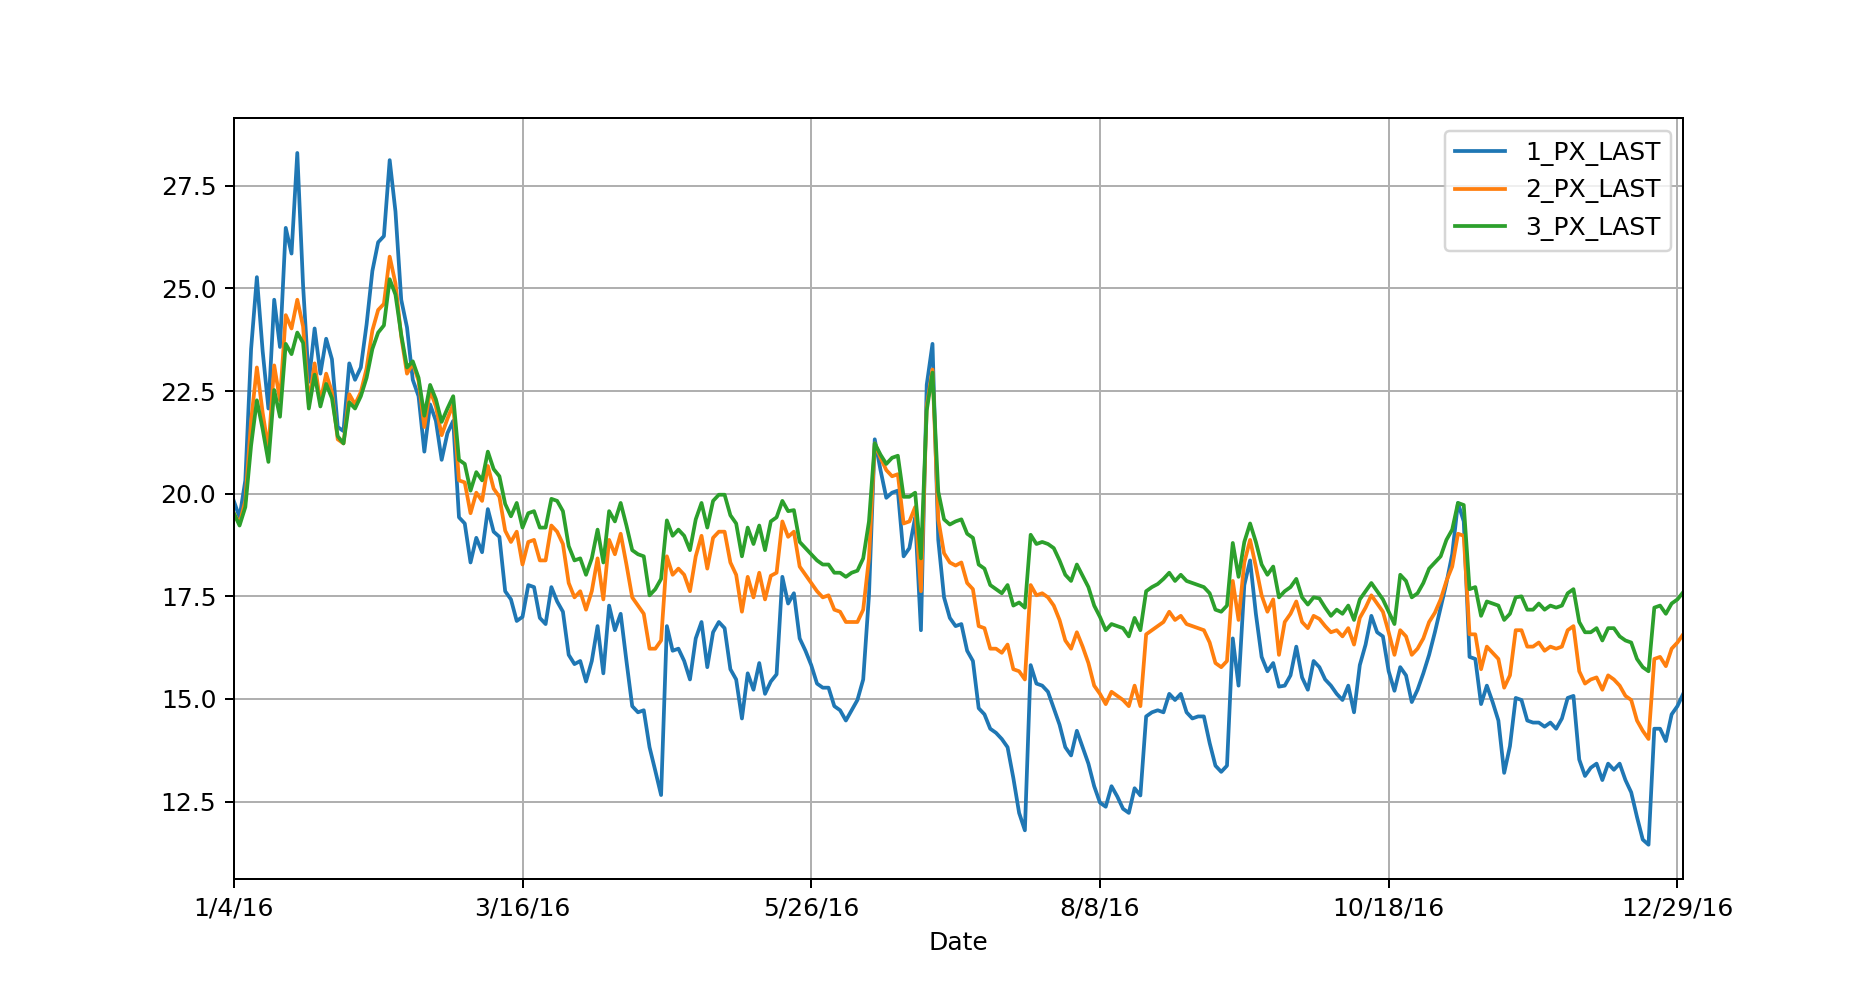

In [20]:
# compare 2016
df_futures_px['1/4/16':'12/30/16'].plot()
plt.grid()

In [ ]:
# Comparison dataframes

In [41]:
sp_all_vix_dr = df_futures.drop(['ES_PX_LAST', 
                                'ES_PX_VOLUME', 
                                '1_Future',
                                '1_PX_LAST',
                                '1_PX_VOLUME',
                                '1_DAYS_UNTIL_EXP',
                                '2_Future',
                                '2_PX_LAST',
                                '2_PX_VOLUME',
                                '2_DAYS_UNTIL_EXP',
                                '3_Future',
                                '3_PX_LAST',
                                '3_PX_VOLUME',
                                '3_DAYS_UNTIL_EXP'],
                                axis=1)
sp_all_vix_dr.head()

,ES_DAILY_RETURN,1_DAILY_RETURN,2_DAILY_RETURN,3_DAILY_RETURN
Date,,,,
1/2/08,-0.012693,0.032007,0.012402,0.006201
1/3/08,0.000171,-0.018441,0.001225,-0.001233
1/4/08,-0.024507,0.053800,0.031811,0.028795
1/7/08,-0.001054,-0.022690,-0.019368,-0.018792
1/8/08,-0.017235,0.058872,0.043934,0.039935


In [109]:
matrix_rank(sp_all_vix_dr)

4

<IPython.core.display.Javascript object>


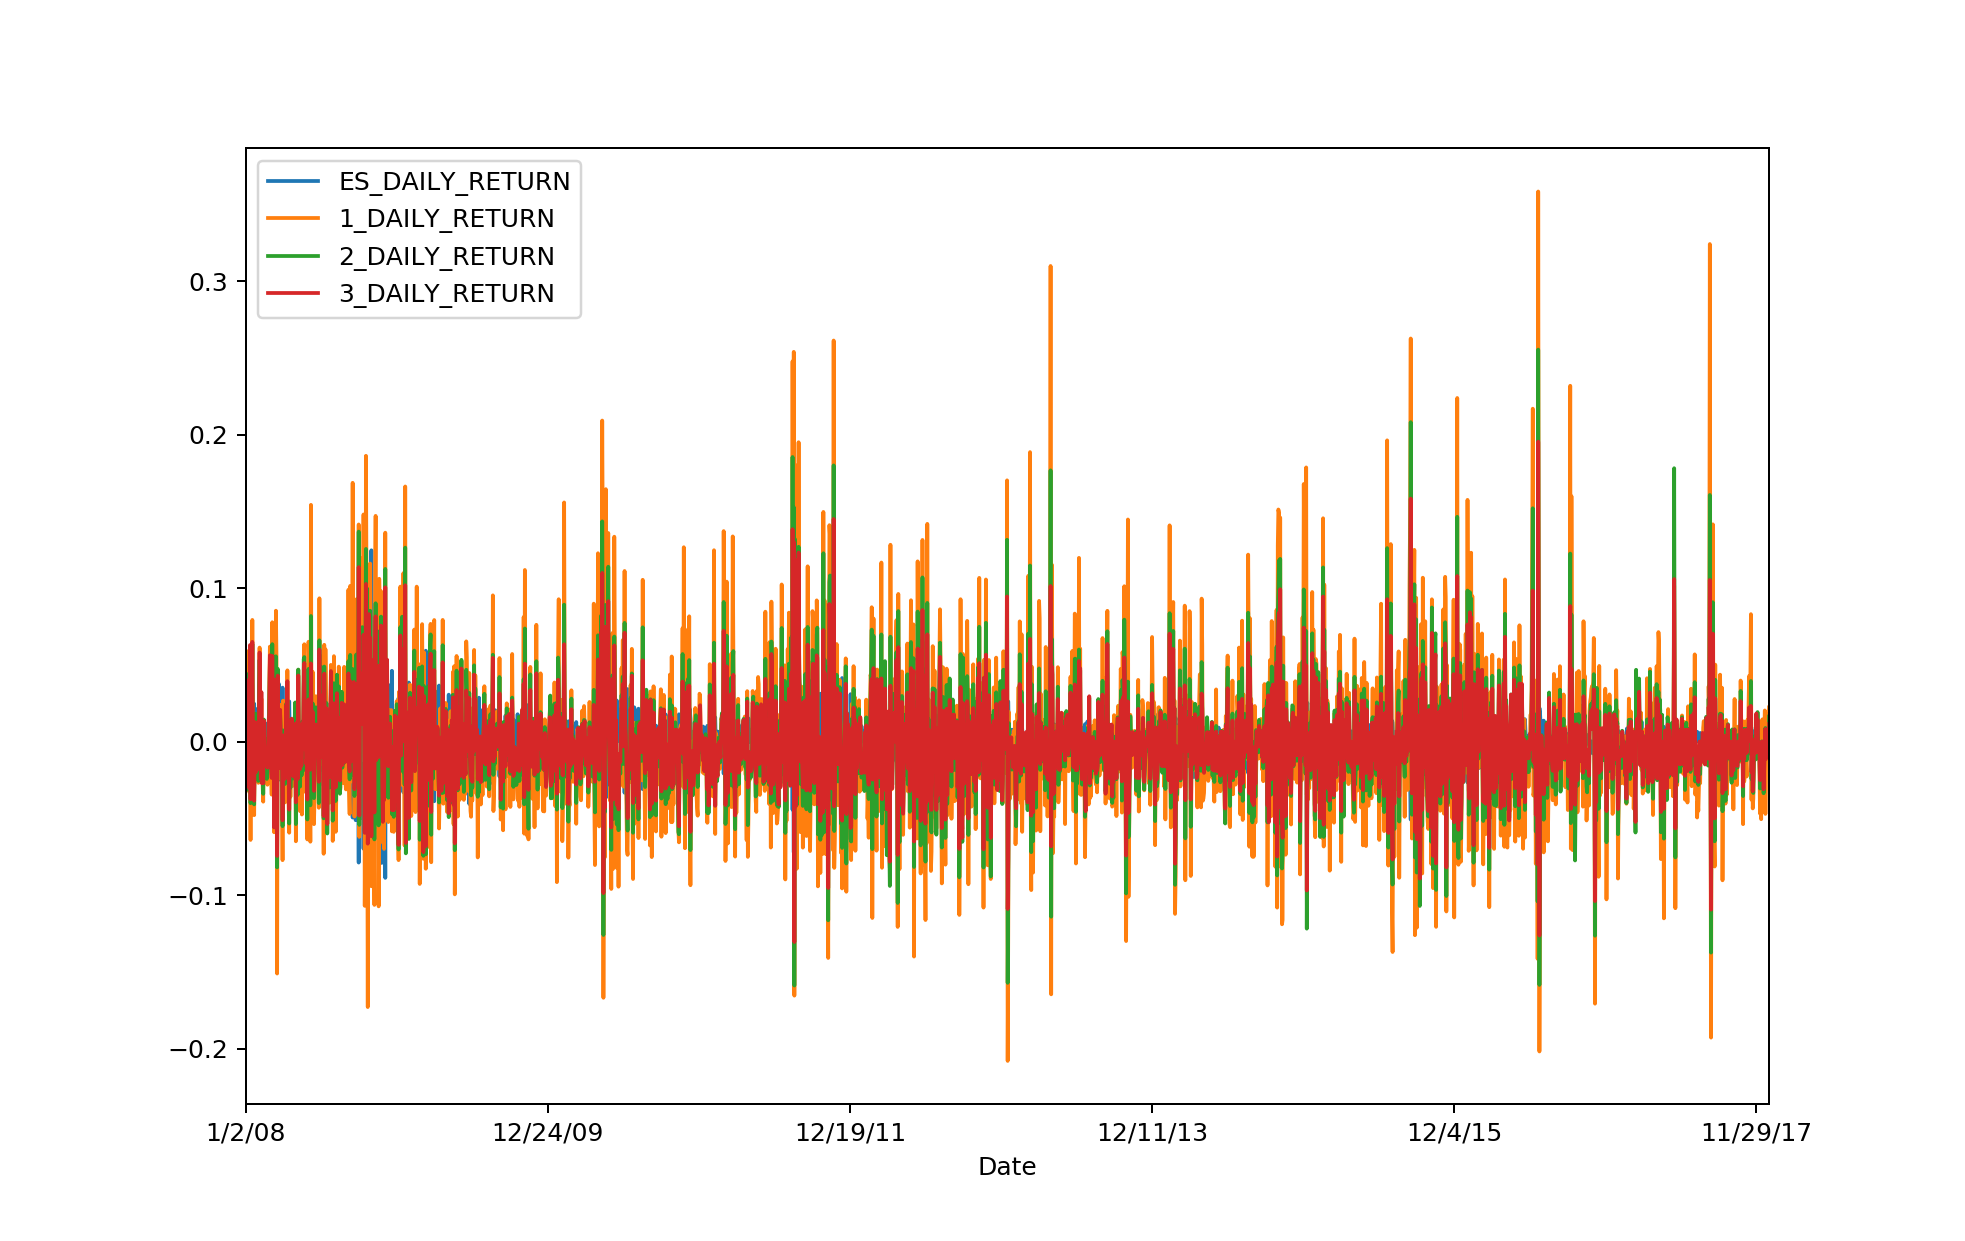

In [42]:
sp_all_vix_dr.plot()

In [63]:
# Sample covariance matrix

mu = array([[es['ES_DAILY_RETURN'].mean(), 0, 0, 0], [0, vix1['1_DAILY_RETURN'].mean(), 0, 0], [0, 0, vix2['2_DAILY_RETURN'].mean(), 0], [0, 0, 0, vix3['3_DAILY_RETURN'].mean()]])
mu_matrix = ones([2522, 4])@mu
Mhat = sp_all_vix_dr - mu_matrix
Sigma_hat = (Mhat.T@Mhat)/2521
Sigma_hat

,ES_DAILY_RETURN,1_DAILY_RETURN,2_DAILY_RETURN,3_DAILY_RETURN
ES_DAILY_RETURN,0.000169,-0.000473,-0.000332,-0.000268
1_DAILY_RETURN,-0.000473,0.002478,0.001662,0.001279
2_DAILY_RETURN,-0.000332,0.001662,0.001245,0.000960
3_DAILY_RETURN,-0.000268,0.001279,0.000960,0.000774


In [86]:
Sigma_hat_a = Sigma_hat.to_numpy()
Sigma_hat_a

array([[ 0.0001691 , -0.0004727 , -0.00033225, -0.00026752],
       [-0.0004727 ,  0.00247836,  0.00166158,  0.0012795 ],
       [-0.00033225,  0.00166158,  0.00124455,  0.00095974],
       [-0.00026752,  0.0012795 ,  0.00095974,  0.00077409]])

In [94]:
V = sqrt(diag(diag(Sigma_hat_a)))
V

array([[0.01300371, 0.        , 0.        , 0.        ],
       [0.        , 0.04978318, 0.        , 0.        ],
       [0.        , 0.        , 0.03527822, 0.        ],
       [0.        , 0.        , 0.        , 0.02782243]])

In [98]:
# Correlation Matrix
corr = inv(V) @ Sigma_hat @ inv(V)
corr

,0,1,2,3
0,1.000000,-0.730183,-0.724263,-0.739417
1,-0.730183,1.000000,0.946088,0.923766
2,-0.724263,0.946088,1.000000,0.977807
3,-0.739417,0.923766,0.977807,1.000000
